In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_new import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_new()
loaders = get_loaders(data, 16)

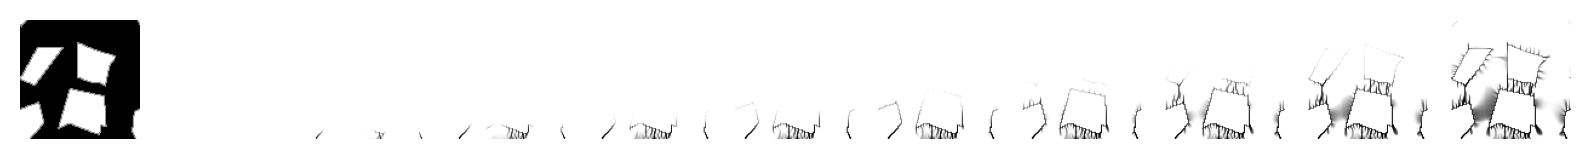

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(12000)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys', vmin=0, vmax=1)
    axs.flat[i].set_axis_off()

In [10]:
torch.min(imp_shrinkage[1:]-imp_shrinkage[:-1])

tensor(-0.0002)

In [4]:
name = 'NN_library/AutoUnet/AutoUnet_new_pt'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [8]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_norm', args)

In [13]:
unet = load_network(unet, name + '_19', args)

In [14]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  554.9570652321
Epoch: 0 batch: 100 mean train loss:  602.4672921041
Epoch: 0 batch: 200 mean train loss:  611.7802640623
Epoch: 0 batch: 300 mean train loss:  558.7964601591
Epoch: 0 batch: 400 mean train loss:  670.9861214072
Epoch: 0 batch: 500 mean train loss:  528.0026690876
Epoch: 0 batch: 600 mean train loss:  671.3844745897
Epoch: 0 batch: 700 mean train loss:  584.0631741500
Epoch: 0 mean train loss:  617.6716622360 mean val. rec. loss:  697.6273803711
Epoch: 1 batch: 0 mean train loss:  550.8839716051
Epoch: 1 batch: 100 mean train loss:  620.1822892278
Epoch: 1 batch: 200 mean train loss:  703.6091727726
Epoch: 1 batch: 300 mean train loss:  529.6224906761
Epoch: 1 batch: 400 mean train loss:  638.9796843380
Epoch: 1 batch: 500 mean train loss:  552.4203262539
Epoch: 1 batch: 600 mean train loss:  677.6185430959
Epoch: 1 batch: 700 mean train loss:  704.9316451792
Epoch: 1 mean train loss:  615.7791328671 mean val. rec. loss:  695.351074218

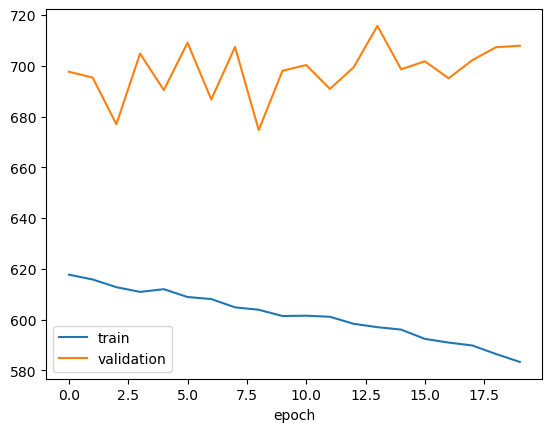

In [15]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [3]:
from NN_library.ConvNet.ConvNet_new import *
from NN_library.ConvNet.train_ConvNet import *
name = 'NN_library/AutoUnet/AutoUnet_w_Conv_new_norm'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet_new_norm'

Using device: cuda


In [4]:
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : conv_name}

In [5]:
unet = AutoUNet()
convnet = ConvNet(16)

In [6]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_new_pt_norm', args)

In [7]:
convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet_new_norm', args)

In [11]:
convnet = load_network(convnet, conv_name + '_19', args)

In [12]:
unet = load_network(unet, name + '_19', args)  

In [8]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.2180334940
Epoch: 0 batch: 100 mean train loss:  0.1948171209
Epoch: 0 batch: 200 mean train loss:  0.1573901025
Epoch: 0 batch: 300 mean train loss:  0.1357491214
Epoch: 0 batch: 400 mean train loss:  0.1480008778
Epoch: 0 batch: 500 mean train loss:  0.1637616372
Epoch: 0 batch: 600 mean train loss:  0.1454190619
Epoch: 0 batch: 700 mean train loss:  0.1438969141
Epoch: 0 mean train loss:  0.1554774208 mean val. rec. loss:  0.1098317355
Epoch: 1 batch: 0 mean train loss:  0.1489758086
Epoch: 1 batch: 100 mean train loss:  0.1563940614
Epoch: 1 batch: 200 mean train loss:  0.1577298634
Epoch: 1 batch: 300 mean train loss:  0.1280619935
Epoch: 1 batch: 400 mean train loss:  0.1495310240
Epoch: 1 batch: 500 mean train loss:  0.1612816788
Epoch: 1 batch: 600 mean train loss:  0.1530179325
Epoch: 1 batch: 700 mean train loss:  0.1470336628
Epoch: 1 mean train loss:  0.1512650517 mean val. rec. loss:  0.1072374508
Epoch: 2 batch: 0 mean train loss:  0.

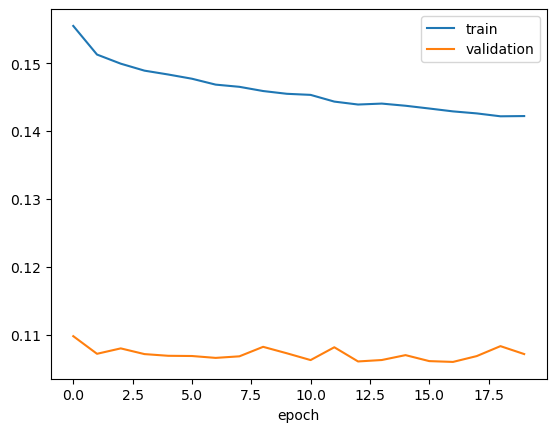

In [9]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])